In [1]:
import glob
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras

In [2]:
os.chdir('data/1. open')

In [3]:
model = keras.models.load_model("210327_aug_Xception_06_35.h5")

In [4]:
test_paths = sorted(glob.glob('./test_imgs/*.jpg'))

In [5]:
X_test = []

for test_path in tqdm(test_paths):
    img = tf.io.read_file(test_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [270, 480])
    img = img/255
    X_test.append(img)

X_test = tf.stack(X_test, axis=0)
X_test.shape

100%|██████████| 1600/1600 [00:11<00:00, 138.26it/s]


TensorShape([1600, 270, 480, 3])

In [6]:
pred = model.predict(X_test)

In [7]:
submission = pd.read_csv('./sample_submission.csv')
# image size를 1920x1080 -> 480x270으로 바꿔서 예측했으므로 * 4
submission.iloc[:, 1:] = pred*4

In [8]:
submission.to_csv('submission_210327_aug_Xception_valacc78%.csv', index=False)

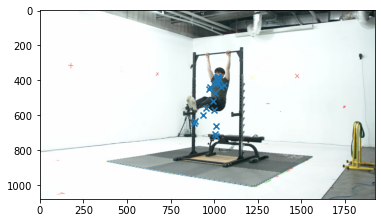

In [14]:
import random
from PIL import Image
import matplotlib.pyplot as plt
# 예측 결과 시각화
n = random.randint(0, 1600)
predicted_keypoint = submission.iloc[n,1:49]
predicted_keypoint = np.array(predicted_keypoint)
img = Image.open(test_paths[n])
plt.imshow(img)
plt.scatter(predicted_keypoint[0::2], predicted_keypoint[1::2], marker='x')